In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster


In [4]:

# Step 1: Load Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target  # Actual class labels

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Hierarchical Clustering
linkage_matrix = sch.linkage(X_scaled, method='complete')
clusters_hier = fcluster(linkage_matrix, 3, criterion='maxclust')

# Step 4: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Step 5: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


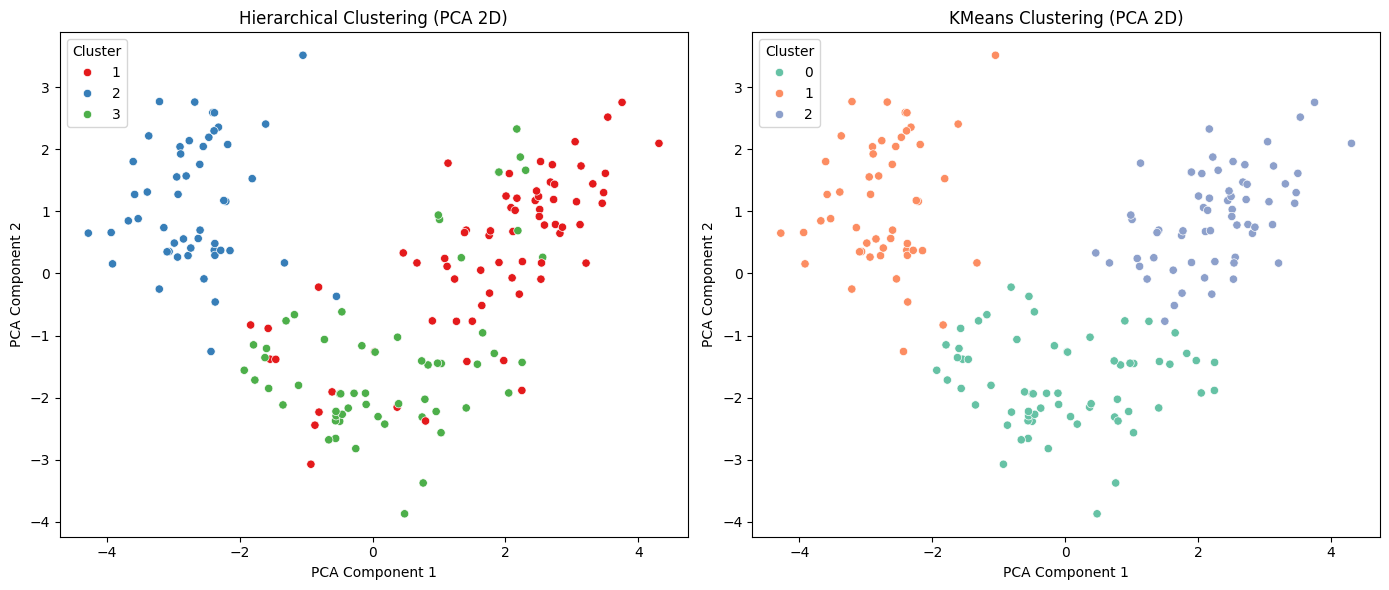

In [5]:

# Step 6: Plot Clusters from Hierarchical Clustering
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_hier, palette='Set1')
plt.title("Hierarchical Clustering (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")

# Step 7: Plot Clusters from KMeans
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_kmeans, palette='Set2')
plt.title("KMeans Clustering (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()


In [6]:

# Step 8: Compare with true labels
print("\nCross-tabulation of Hierarchical Clustering vs True Labels:")
print(pd.crosstab(clusters_hier, y))

print("\nCross-tabulation of KMeans Clustering vs True Labels:")
print(pd.crosstab(clusters_kmeans, y))



Cross-tabulation of Hierarchical Clustering vs True Labels:
col_0   0   1   2
row_0            
1      51  18   0
2       0   3  48
3       8  50   0

Cross-tabulation of KMeans Clustering vs True Labels:
col_0   0   1   2
row_0            
0       0  65   0
1       0   3  48
2      59   3   0
